**Logistical Regression by using a neural network**

In [1]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv('WineQT.csv' , sep = ',')
df.drop('Id', axis = 1, inplace = True)

def classify_quality(quality): #Making it binary for logistical regression. 0 = undrinkable 1 = drinkable
    return 1 if quality > 5 else 0

df['quality'] = df['quality'].apply(classify_quality)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1


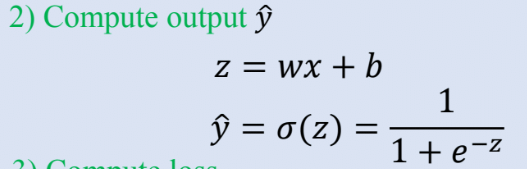

In [2]:
#Calculating z using the numpy.dot (it multiplies every feature with the corresponding weight)
def calc_z(weights,x,bias):
    return np.dot(weights, x) + bias

In [3]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))  #Sigmoid-Function to only output values between 0 and 1


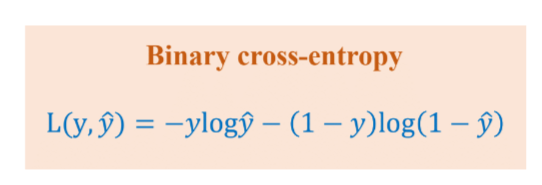

In [4]:
#loss function between y and y_hat (Binary cross entropy)
def Bce(y_hat,y):
    # Clip y_hat to avoid log(0)
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)  #Prevent division by zero
    return - (y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))   

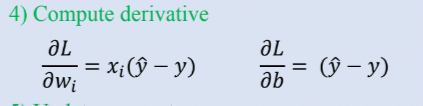


In [5]:
def derivative_x (y_hat,y,x):
    return x*(y_hat-y)
def derivative_b (y_hat,y):
    return y_hat-y

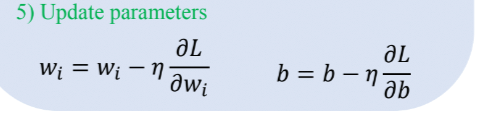

In [6]:
def updateweights(weights,lr,derivative_x):
    return weights - lr* derivative_x
def updatebias(bias,lr,derivative_b): 
    return bias -lr* derivative_b

In [7]:
#Initializing random weight, bias and learning rate 
weights = np.random.uniform(-1, 1, 11)  # Initialize weights randomly
bias = np.random.uniform(-1,1,1)
rows= 1142

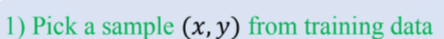

In [8]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = df['quality'].values

In [9]:
def train_model(x, y,weights,bias,rows,epoch, lr,):
    print(weights)
    for epochs in range(epoch):
        total_loss = 0
        for i in range(rows):
            z = calc_z(weights,x[i],bias) 
            y_hat = sigmoid(z) #calculate expected y value
            loss = Bce(y_hat,y[i])
            total_loss = total_loss + loss
            deriv_x = derivative_x(y_hat, y[i], x[i]) 
            deriv_b = derivative_b(y_hat, y[i])
            weights = updateweights(weights,lr,deriv_x)
            bias = updatebias(bias,lr,deriv_b)
        if epochs % 10 == 0:
            print(f'Epoche {epochs}, Average Loss: {total_loss/rows}') 
    return weights,bias

In [10]:
trained_weights, trained_bias = train_model(x,y,weights,bias,rows,300,0.001)

[-0.23937111  0.86655198 -0.76560582 -0.01523942 -0.09973784 -0.99693237
 -0.31434642  0.73361946 -0.40665292 -0.31494551 -0.57892721]
Epoche 0, Average Loss: [0.38847068]
Epoche 10, Average Loss: [-0.07774816]
Epoche 20, Average Loss: [-0.07316093]
Epoche 30, Average Loss: [-0.06838008]
Epoche 40, Average Loss: [-0.06521037]
Epoche 50, Average Loss: [-0.06328476]
Epoche 60, Average Loss: [-0.06219034]
Epoche 70, Average Loss: [-0.06161441]
Epoche 80, Average Loss: [-0.06133481]
Epoche 90, Average Loss: [-0.06120265]
Epoche 100, Average Loss: [-0.06111967]
Epoche 110, Average Loss: [-0.06102277]
Epoche 120, Average Loss: [-0.06087526]
Epoche 130, Average Loss: [-0.06066075]
Epoche 140, Average Loss: [-0.06037702]
Epoche 150, Average Loss: [-0.06003038]
Epoche 160, Average Loss: [-0.05963107]
Epoche 170, Average Loss: [-0.05919021]
Epoche 180, Average Loss: [-0.05871825]
Epoche 190, Average Loss: [-0.05822432]
Epoche 200, Average Loss: [-0.05771612]
Epoche 210, Average Loss: [-0.0572000

In [11]:
correct_predictions = 0 
total_predictions = len(x)

for i in range(total_predictions):  # 
    z = calc_z(x[i], trained_weights, trained_bias)  
    prob = sigmoid(z)  # Calculate probability
    
    # Convert probability to binary output (0 or 1)
    prediction = 1 if prob > 0.5 else 0
    if prediction == y[i]:  # If the prediction matches the actual value
        correct_predictions += 1
        
accuracy = (correct_predictions / total_predictions) *100
print(f'The Accuracy that the neural network predicts the right outcome is: {accuracy}%')

The Accuracy that the neural network predicts the right outcome is: 72.96587926509186%


**References** \
WhineQT.csv file : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download \
Numpy library : https://numpy.org \
Pandas library: https://pandas.pydata.org \
math library : https://docs.python.org/3/library/math.html \
lecture files : (https://www.dropbox.com/scl/fo/7w9vvq7r6b7w0ffn7lfv9/AJlC3jzQeZIc5YuEmS5H8Ys?e=2&preview=From+Linear+Regression+to+Logistic+Regression.pdf&rlkey=5tx1qycellowj4e67nyu9ok5q&dl=0)